In [152]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline

In [153]:
dfsource = pd.read_csv("dataForClustering_.csv")
df = dfsource.iloc[:,:-1]#all cols except bookname col 
df_names= dfsource.iloc[:,-1:]#bookname col
namelist = df_names.values.tolist()
namelist = [i[0] for i in namelist]#flatten
namelist
df

,point1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,point 11,point 12,point 13,point 14,point 15,point 16,point 17,point 18,point 19
0,5.278057,5.277073,5.297691,5.313920,5.302599,5.314356,5.335452,5.335705,5.366351,5.368292,5.364832,5.362244,5.357617,5.347885,5.322837,5.275399,5.292993,5.343905,5.378727
1,5.284671,5.308155,5.325166,5.350037,5.363998,5.350037,5.362518,5.396265,5.388683,5.360022,5.314904,5.272467,5.257951,5.271820,5.254900,5.276072,5.278476,5.249815,5.240570
2,5.325406,5.305446,5.282063,5.305312,5.334608,5.334563,5.329673,5.351678,5.367593,5.366348,5.354612,5.293976,5.206890,5.155679,5.128473,5.112825,5.094065,5.089131,5.103267
3,5.391304,5.408672,5.434074,5.468632,5.452328,5.405541,5.365784,5.340383,5.319412,5.345759,5.312677,5.288221,5.273393,5.273984,5.273511,5.269553,5.295132,5.288221,5.301867
4,5.315902,5.350974,5.355123,5.349717,5.350094,5.376618,5.404588,5.408108,5.428787,5.421307,5.452797,5.520679,5.578190,5.591452,5.583784,5.586235,5.589063,5.622879,5.642615
5,5.274326,5.257574,5.227907,5.227139,5.199567,5.196147,5.219042,5.209828,5.202080,5.220578,5.191819,5.223370,5.236004,5.263437,5.270557,5.260924,5.262530,5.254572,5.266299
6,5.310131,5.290306,5.293513,5.300073,5.307216,5.310204,5.326895,5.344971,5.334548,5.319461,5.309767,5.304883,5.306633,5.283746,5.273761,5.267857,5.266618,5.266983,5.262391
7,5.458411,5.450186,5.469429,5.466015,5.484792,5.507759,5.509156,5.515829,5.526536,5.530726,5.539727,5.526071,5.509777,5.485568,5.493327,5.499224,5.474395,5.459497,5.478119
8,5.446829,5.443509,5.447659,5.423533,5.416301,5.397451,5.366509,5.354060,5.318376,5.296562,5.281031,5.271962,5.266331,5.269472,5.286366,5.285951,5.290634,5.278305,5.268050
9,5.566900,5.566034,5.535864,5.486980,5.458142,5.442824,5.426840,5.425641,5.416650,5.421712,5.414652,5.403596,5.411921,5.418848,5.433367,5.470263,5.492041,5.514352,5.524875


## Elbow method to determine best K value

In [154]:
k_range = range(1,9)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df1)
    sse.append(km.inertia_)
sse


[3.893602188210536,
 1.9401972013452171,
 1.3832768601966006,
 1.1171012439803705,
 0.9126582700142307,
 0.723112416670699,
 0.6454197024538825,
 0.5649526253976652]

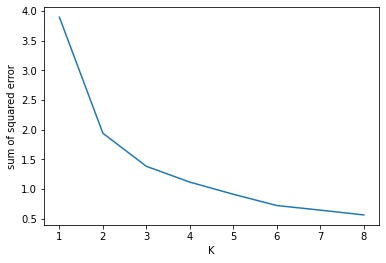

In [155]:
plt.xlabel("K")
plt.ylabel("sum of squared error")
plt.plot(k_range,sse)

## Apply KMeans to generate clusters as new column

In [156]:
clusters = 6
kmeans = KMeans(n_clusters = clusters)
y_predicted = kmeans.fit_predict(df)
print(kmeans.labels_)
print(kmeans.inertia_)

[1 1 1 4 5 3 1 0 4 0 2 4 3 4 2 3 1 2 3 1 0 2 1 3]
0.9773956368825938


In [157]:
df["cluster"] = y_predicted
pd.set_option('display.max_rows', None)
# df.head()

## Add back bookname column to df

In [158]:
df["book name"] = namelist
df

,point1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,...,point 12,point 13,point 14,point 15,point 16,point 17,point 18,point 19,cluster,book name
0,5.278057,5.277073,5.297691,5.313920,5.302599,5.314356,5.335452,5.335705,5.366351,5.368292,...,5.362244,5.357617,5.347885,5.322837,5.275399,5.292993,5.343905,5.378727,1,The winters tale
1,5.284671,5.308155,5.325166,5.350037,5.363998,5.350037,5.362518,5.396265,5.388683,5.360022,...,5.272467,5.257951,5.271820,5.254900,5.276072,5.278476,5.249815,5.240570,1,The terror
2,5.325406,5.305446,5.282063,5.305312,5.334608,5.334563,5.329673,5.351678,5.367593,5.366348,...,5.293976,5.206890,5.155679,5.128473,5.112825,5.094065,5.089131,5.103267,1,The island of doctor moreau
3,5.391304,5.408672,5.434074,5.468632,5.452328,5.405541,5.365784,5.340383,5.319412,5.345759,...,5.288221,5.273393,5.273984,5.273511,5.269553,5.295132,5.288221,5.301867,4,Magic of oz
4,5.315902,5.350974,5.355123,5.349717,5.350094,5.376618,5.404588,5.408108,5.428787,5.421307,...,5.520679,5.578190,5.591452,5.583784,5.586235,5.589063,5.622879,5.642615,5,Road to oz
5,5.274326,5.257574,5.227907,5.227139,5.199567,5.196147,5.219042,5.209828,5.202080,5.220578,...,5.223370,5.236004,5.263437,5.270557,5.260924,5.262530,5.254572,5.266299,3,Warlord of kor
6,5.310131,5.290306,5.293513,5.300073,5.307216,5.310204,5.326895,5.344971,5.334548,5.319461,...,5.304883,5.306633,5.283746,5.273761,5.267857,5.266618,5.266983,5.262391,1,Justice
7,5.458411,5.450186,5.469429,5.466015,5.484792,5.507759,5.509156,5.515829,5.526536,5.530726,...,5.526071,5.509777,5.485568,5.493327,5.499224,5.474395,5.459497,5.478119,0,Lady susan
8,5.446829,5.443509,5.447659,5.423533,5.416301,5.397451,5.366509,5.354060,5.318376,5.296562,...,5.271962,5.266331,5.269472,5.286366,5.285951,5.290634,5.278305,5.268050,4,The house of the vampire
9,5.566900,5.566034,5.535864,5.486980,5.458142,5.442824,5.426840,5.425641,5.416650,5.421712,...,5.403596,5.411921,5.418848,5.433367,5.470263,5.492041,5.514352,5.524875,0,The life and adventures of santa claus


In [159]:
def transform(df):
    df = df.T
    df.reset_index(drop=True, inplace=True)
    return df

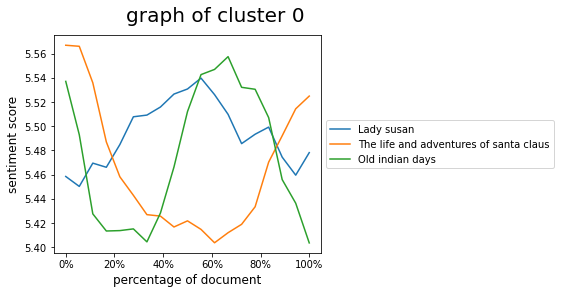

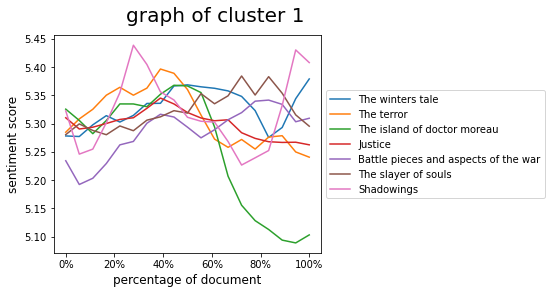

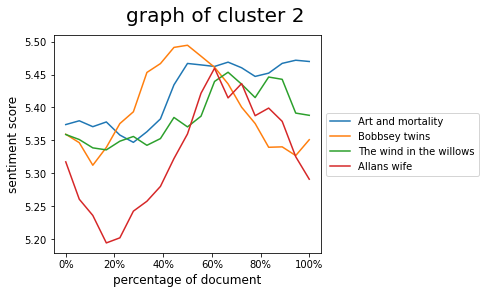

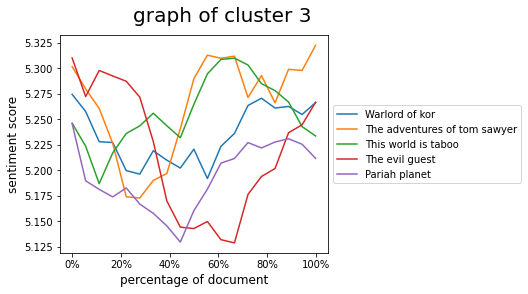

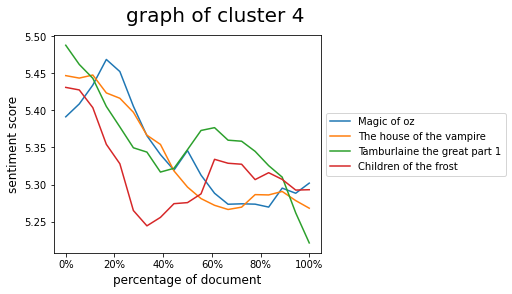

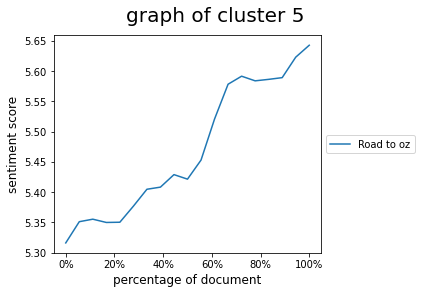

In [160]:
def plot_a_cluster(df,cluster_num):
    booknames = []
    data = transform(df)
    datalist =  data.values.tolist()
#     datalist = np.array(datalist)
    numrows_data = len(datalist)
    booknames = df.iloc[-1].values.tolist()
    
    y = datalist[0][:-2]
    x = np.linspace(0,100,len(y))


    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, y, label='%s'%booknames[0])
 
    if numrows_data>1:
        for i in range(1,numrows_data):
            next_y= datalist[i][:-2]
            ax.plot(x,next_y, label = "%s"%booknames[i])


    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
#     plt.yticks(np.arange(float(min(y)), float(max(y))+1, 0.5))


    fig.suptitle("graph of cluster %i"%cluster_num, fontsize = 20)
    plt.xlabel('percentage of document', fontsize=12)
    plt.ylabel('sentiment score', fontsize=12)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

for i in range(clusters):
    df_i = df[df.cluster.isin([i])]
    df_i = transform(df_i)
    plot_a_cluster(df_i,i)